In [2]:
import matplotlib.pyplot as plt
import re

def parse_log(file):
    with open(file, 'r') as f:
        content = f.read()
    
    epochs = re.findall(r'Epoch: (\d+)', content)
    train_acc1 = re.findall(r'Top-1 Training ACC: (\d+\.\d+)', content)
    train_acc5 = re.findall(r'Top-5 Training ACC: (\d+\.\d+)', content)
    val_acc1 = re.findall(r'Top-1 Val ACC: (\d+\.\d+)', content)
    val_acc5 = re.findall(r'Top-5 Val ACC: (\d+\.\d+)', content)
    train_loss = re.findall(r'Training Loss: (\d+\.\d+)', content)

    # Convert to appropriate data types
    epochs = list(map(int, epochs))
    train_acc1 = list(map(float, train_acc1))
    train_acc5 = list(map(float, train_acc5))
    val_acc1 = list(map(float, val_acc1))
    val_acc5 = list(map(float, val_acc5))
    train_loss = list(map(float, train_loss))
    
    return epochs, train_acc1, train_acc5, val_acc1, val_acc5, train_loss

In [3]:
def plot_progress(epochs, train_acc1, train_acc5, val_acc1, val_acc5, train_loss):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, train_acc1, label='Training Top-1 ACC')
    plt.plot(epochs, train_acc5, label='Training Top-5 ACC')
    plt.plot(epochs, val_acc1, label='Validation Top-1 ACC')
    plt.plot(epochs, val_acc5, label='Validation Top-5 ACC')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


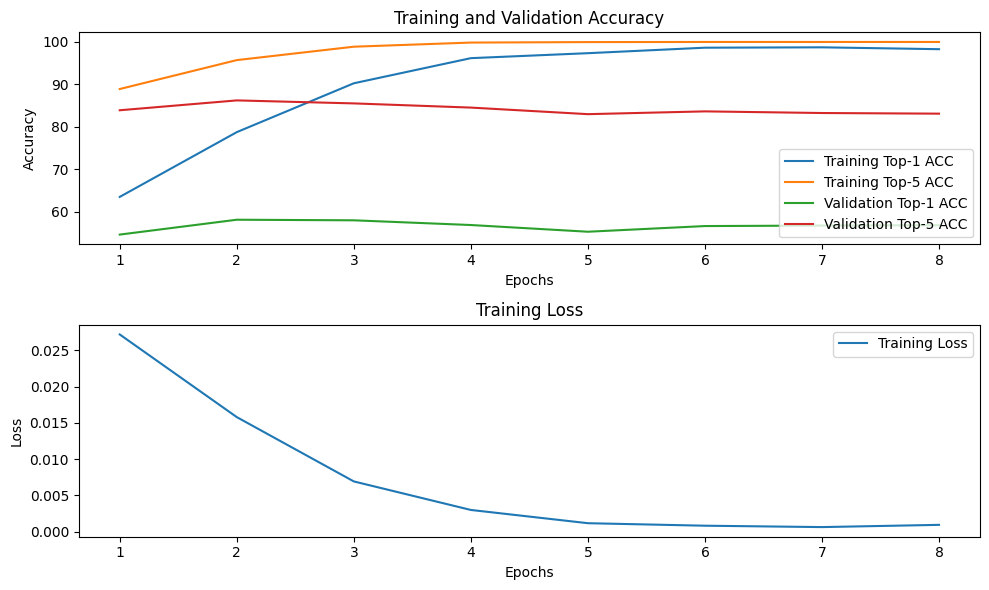

In [4]:
file = '/home/ubuntu/CS231N/cs231n_final_project/ConvNext/logs/convNext-from_pretrain-10epochs-lr_0.0001-l2_0.001-23_19_58.txt'  # Set your filename here
epochs, train_acc1, train_acc5, val_acc1, val_acc5, train_loss = parse_log(file)
plot_progress(epochs, train_acc1, train_acc5, val_acc1, val_acc5, train_loss)
